<a href="https://colab.research.google.com/github/virajvaidya/BayesianStatisticsinPython/blob/main/BayesianStatsIntro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Completed as part of a course taught by Mr. Ning Xu at The University of Sydney**

In [30]:
import numpy             as np
import scipy             as sp
import pandas            as pd
import matplotlib.pyplot as plt
import statsmodels.api   as sm

from scipy.stats         import randint
from scipy.stats         import norm
from scipy.stats         import beta

np.random.seed(seed=5)

In [25]:
Y=[]
X=[]

beta_0 = []
beta_1 = []
group  = []

for i in range(1,120):
  ind =randint.rvs(0,3)
  b0 =ind * 5+5
  b1 =ind * 5+5

  income = norm.rvs(loc=5, scale=5, size=1)[0]
  random = norm.rvs(loc=0, scale=5, size=1)[0]

  consumption = b0 + b1 + income + random

  Y.append(consumption)
  X.append(income)
  beta_0.append(b0)
  beta_1.append(b1)
  group.append(ind)


d= {'Y': pd.Series(Y),
    'X': pd.Series(X),
    'group': pd.Series(group)
    }

df=pd.DataFrame(d)

In [26]:
df

,Y,X,group
0,43.906319,8.131866,2
1,34.198867,6.730417,2
2,30.426924,11.702335,1
3,21.444848,-0.877242,2
4,33.025714,6.722855,1
...,...,...,...
114,-0.178923,3.549528,0
115,40.418463,1.337732,2
116,27.678511,2.300698,2
117,9.540418,-2.036755,1


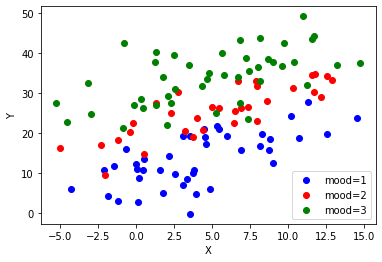

In [27]:
fig=plt.figure()

plt.scatter(df['X'][df['group']==0], df['Y'][df['group']==0],color='blue',label='mood=1')
plt.scatter(df['X'][df['group']==1], df['Y'][df['group']==1],color='red',label='mood=2')
plt.scatter(df['X'][df['group']==2], df['Y'][df['group']==2],color='green',label='mood=3')

plt.xlabel('X')
plt.ylabel('Y')

plt.legend()
plt.show()


In [22]:
X_one =df[['X']]
X_one =sm.add_constant(X_one)
Y_one =df[['Y']]

reg1 = sm.OLS(Y_one, X_one)

result1=reg1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     53.57
Date:                Fri, 24 Dec 2021   Prob (F-statistic):           3.41e-11
Time:                        00:33:14   Log-Likelihood:                -426.33
No. Observations:                 119   AIC:                             856.7
Df Residuals:                     117   BIC:                             862.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.4982      1.218     15.183      0.0

In [23]:
df['Yhat'] = result1.predict()

#Bayesian Regression with Discrete and Continuous Prior

In [31]:
Y1 = []
X1 = []

beta1_0 = []
beta1_1 = []
group1  = []

for i in range(1,200):
    
    ind1 = beta.rvs(2, 2, size=1)[0] * 2 - 1;
    b10  = ind1 * 10
    b11  = ind1 * 10

    income = norm.rvs(loc=5, scale=5, size=1)[0]
    random = norm.rvs(loc=0, scale=5, size=1)[0]

    consumption = b10 + b11 * income + random
    
    Y1.append(consumption)
    X1.append(income)
    beta1_0.append(b10)
    beta1_1.append(b11)
    group1.append(ind1)
    
d1 = {'Y' : pd.Series(Y1),
     'X' : pd.Series(X1),
     'mood' : pd.Series(group1)
    }
 
df1 = pd.DataFrame(d1)

In [32]:
df1

,Y,X,mood
0,50.923136,17.153856,0.287452
1,-32.165212,5.938016,-0.439836
2,6.695106,-3.323943,-0.438737
3,-6.419905,0.096961,-0.194687
4,-19.093524,9.982199,-0.206294
...,...,...,...
194,36.560757,6.574009,0.502103
195,-32.426403,5.089789,-0.538012
196,-9.426082,-1.601992,-0.072326
197,44.756371,6.234806,0.542011


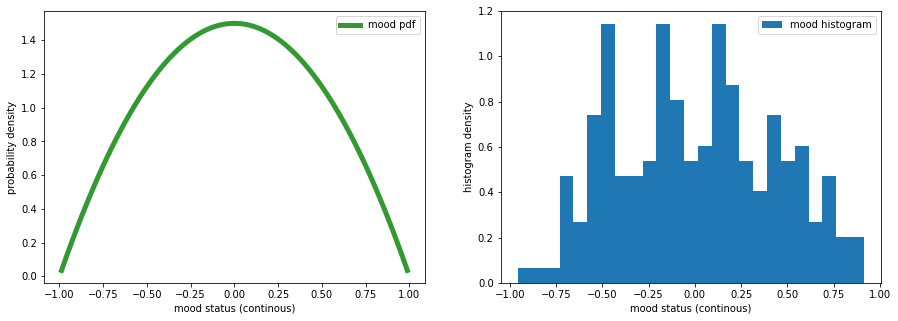

In [36]:
x = np.linspace(beta.ppf(0.0001, 2, 2),
                beta.ppf(0.9999, 2, 2), 100)

fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot((x-0.5)*2, beta.pdf(x, 2, 2), 'g-', lw=5, alpha=0.8, label='mood pdf')
ax1.set_ylabel('probability density')
ax1.set_xlabel('mood status (continous)')
ax1.legend()

ax2.hist(df1['mood'], bins=25, density=True, label="mood histogram")
ax2.set_ylabel('histogram density')
ax2.set_xlabel('mood status (continous)')
ax2.legend()


plt.show()

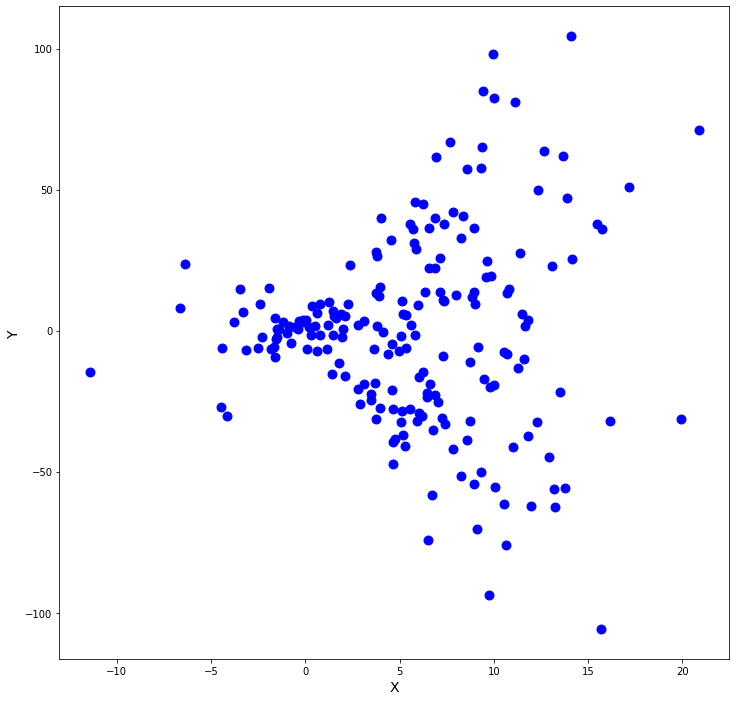

In [37]:
fig = plt.figure()

fig.set_figheight(12)
fig.set_figwidth(12)

plt.scatter(df1['X'], df1['Y'], color='blue', s=80)

plt.xlabel('X', fontsize="14")
plt.ylabel('Y', fontsize="14")

plt.show()

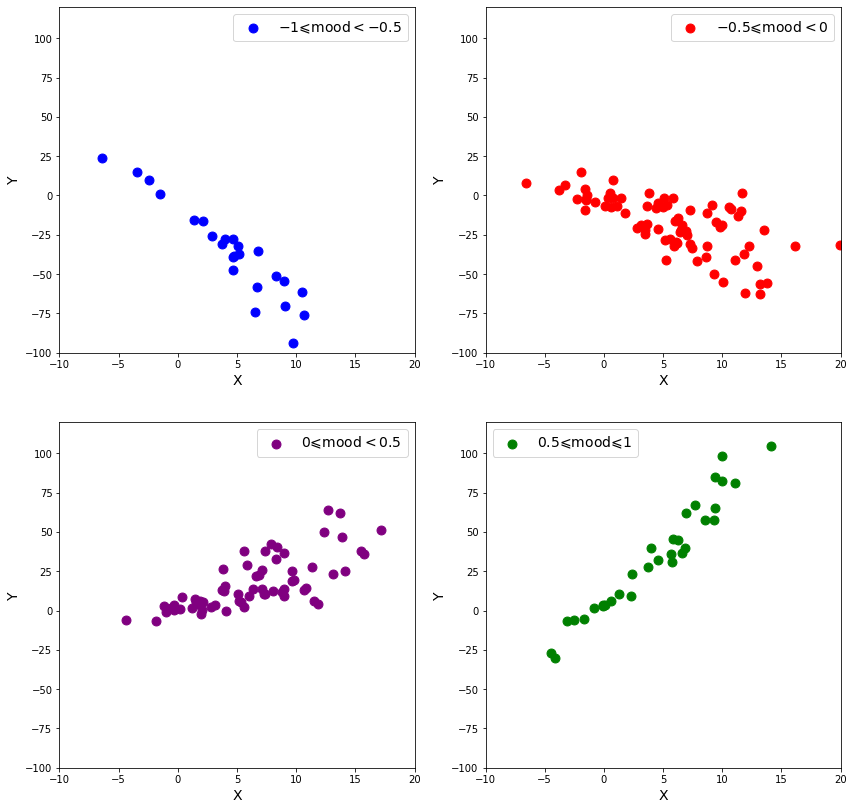

In [38]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2)

fig.set_figheight(14)
fig.set_figwidth(14)

ax1.scatter(df1['X'][df1['mood'] <= -0.5], df1['Y'][df1['mood'] <= -0.5], color='blue', label=r'$ -1 \leqslant \mathrm{mood} < -0.5$', s=80)
ax1.set_xlabel('X', fontsize='14')
ax1.set_ylabel('Y', fontsize='14')
ax1.set_xlim([-10, 20])
ax1.set_ylim([-100, 120])
ax1.legend(fontsize='14')

ax2.scatter(df1['X'][(df1['mood'] < 0) & (df1['mood'] > -0.5)] , df1['Y'][(df1['mood'] < 0) & (df1['mood'] > -0.5)], color='red', label=r'$-0.5 \leqslant \mathrm{mood} < 0$', s=80)
ax2.set_xlabel('X', fontsize='14')
ax2.set_ylabel('Y', fontsize='14')
ax2.set_xlim([-10, 20])
ax2.set_ylim([-100, 120])
ax2.legend(fontsize='14')

ax3.scatter(df1['X'][(df1['mood'] < 0.5) & (df1['mood'] > 0)] , df1['Y'][(df1['mood'] < 0.5) & (df1['mood'] > 0)], color='purple', label=r'$0 \leqslant \mathrm{mood} < 0.5$', s=80)
ax3.set_xlabel('X', fontsize='14')
ax3.set_ylabel('Y', fontsize='14')
ax3.set_xlim([-10, 20])
ax3.set_ylim([-100, 120])
ax3.legend(fontsize='14')

ax4.scatter(df1['X'][(df1['mood'] < 1) & (df1['mood'] > 0.5)] , df1['Y'][(df1['mood'] < 1) & (df1['mood'] > 0.5)], color='green', label=r'$0.5 \leqslant \mathrm{mood} \leqslant 1$', s=80)
ax4.set_xlabel('X', fontsize='14')
ax4.set_ylabel('Y', fontsize='14')
ax4.set_xlim([-10, 20])
ax4.set_ylim([-100, 120])
ax4.legend(fontsize='14')

plt.show()
